# Example Usage for GeoCluster Package

In [4]:
## Basic stuff
%load_ext autoreload
%autoreload
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>div.output_area{max-height:10000px;overflow:scroll;}</style>"""))


## Python Version
import sys
print("Python: {0}".format(sys.version))


## Install
from timeUtils import clock, elapsed
from ioUtils import saveJoblib
from geocluster import geoClusters
from geoUtils import convertMetersToLat, convertLatToMeters, convertMetersToLong, convertLongToMeters
from geoclusterUtils import genCenters, genCluster, genClusters, genTripsBetweenClusters

import datetime as dt
start = dt.datetime.now()
print("Notebook Last Run Initiated: "+str(start))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Python: 3.6.5 |Anaconda custom (x86_64)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Notebook Last Run Initiated: 2018-11-05 09:56:03.459649










































# Example GPS Data

In [5]:
genMax  = 75
distMax = 500
raw = genClusters(20, 250, latRange=[29.8, 30.2], lngRange=[49.8, 50.2], dist="gauss", maxrad=genMax)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current Time is Mon Nov 05, 2018 09:56:20 for Converting 5000 Points To Correct Format
Data has correct format with a (5000, 2) shape.
Current Time is Mon Nov 05, 2018 09:56:20 for Done with Converting 5000 Points To Correct Format
Process [Done with Converting 5000 Points To Correct Format] took 0 seconds.
Current Time is Mon Nov 05, 2018 09:56:20 for Finding Geohash (BitLen=8) Values from 5000 Points
Current Time is Mon Nov 05, 2018 09:56:21 for Done with Finding Geohash (BitLen=8) Values from 5000 Points
Process [Done with Finding Geohash (BitLen=8) Values from 5000 Points] took 0 seconds.
Current Time is Mon Nov 05, 2018 09:56:21 for Finding Geohash (BitLen=8) Frequency Values from Geohash DataFrame
Current Time is Mon Nov 05, 2018 09:56:21 for Done with Finding Geohash (BitLen=8) Frequency Values from Geohash DataFrame
Process [Done with Finding Geohash (BitLen=8) Frequency Values from Geohash 

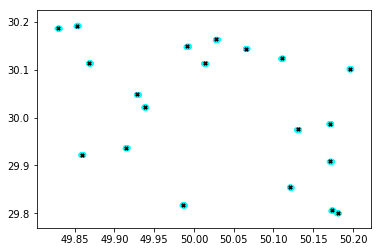

In [7]:
def plotMeters(ax1, longMeters, latMeters):
    ax2 = ax1.twinx()
    ax2.plot(longMeters, latMeters, color='b', lw=0)
    ax3 = ax1.twiny()
    ax3.plot(longMeters, latMeters, color='b', lw=0)
    
def plotRawData(rawdata, color='cyan'):
    import seaborn as sns
    from matplotlib import pyplot as plt 
    fig, ax1 = plt.subplots()
    lat = rawdata[:,0]
    long = rawdata[:,1]
    ax1.scatter(long, lat, s=15, linewidth=0, color='cyan', alpha=1) #c=cluster_member_colors, alpha=1)
    return ax1

def clusterData(rawdata, distMax):
    %load_ext autoreload
    %autoreload
    gc = geoClusters(key="test", points=rawdata, distMax=distMax, debug=True)
    gc.findClusters(seedMin=2, debug=True)
    if True:
        print("Found {0} clusters using {1} cells and {2} counts".format(gc.getNClusters(), gc.getNCells(), gc.getNCounts()))
    return gc

def plotClusters(ax1, gc, color='red'):
    from seaborn import color_palette
    from matplotlib.patches import Circle, Wedge, Polygon
    from matplotlib.collections import PatchCollection
    
    clusters = gc.getClusters()
    coms = gc.getClusterCoMs()
    color_palette = color_palette('deep', 2)
    patches = []
    print("Plotting {0} clusters".format(len(clusters)))
    for cl, cluster in clusters.items():
        radius = cluster.getRadius()
        com    = cluster.getCoM()
        quant  = cluster.getQuantiles()
        
        radius = quant[-1]
        ax1.scatter(com[1], com[0], s=10, marker='x', linewidth=2, c='black', alpha=1)

        latDist = convertMetersToLat(radius)
        circle = Circle(xy=(com[1], com[0]), radius=latDist)
        patches.append(circle)

    p = PatchCollection(patches, facecolor='red', alpha=0.25)
    from numpy import array, linspace
    #p.set_array(linspace(0,1,len(pcols)))
    ax1.add_collection(p)

#latOff = lat - min(lat)
#latMeters = convertLatToMeters(latOff)
#lngOff = long - min(long)
#lngMeters = convertLongToMeters(lngOff, lat)

#plotMeters(ax1, latMeters, lngMeters)
gc  = clusterData(raw, distMax=distMax)
ax1 = plotRawData(raw)
ax1 = plotClusters(ax1, gc)

## Generate Random Data From Clusters

In [ ]:
data = genTripsBetweenClusters(1000, gc, returnLoc=True, returnDF=True)

In [ ]:
saveJoblib(data, "trips.p")

In [142]:
from numpy.random import shuffle

In [143]:
x = genTripsBetweenClusters(100, gc, returnDF=True)

Selected 100 randomized trips
Found Start/End for the 100 randomized trips
Converting (100, 2, 2) trips to a DataFrame


In [144]:

def random_date(start,l):
    current = start
    while l >= 0:
        current = current + datetime.timedelta(minutes=randrange(10))
    yield current
    l-=1



startDate = datetime.datetime(2013, 9, 20,13,00)


,lat0,long0,lat1,long1,total_miles,duration
0,29.988562,50.172825,30.114458,49.868167,32.492858,649.857161
1,29.808399,50.174997,30.115348,50.014110,37.485388,749.707764
2,29.988291,50.171539,29.935549,49.915782,25.326593,506.531853
3,29.801494,50.182482,30.193199,49.853051,53.884258,1077.685169
4,30.023131,49.938319,30.112894,49.868407,12.036825,240.736498
5,29.988111,50.172368,30.116535,49.868712,32.528082,650.561641
6,29.909687,50.170235,29.909520,50.172363,0.205933,4.118657
7,29.986211,50.172827,29.816707,49.986801,26.015172,520.303430
8,29.854474,50.121128,30.113744,50.013577,30.633957,612.679148
9,29.974688,50.129358,29.819659,49.987020,22.032446,440.648922


In [101]:
ch(x, k=100)

[('cl16', 'cl2'),
 ('cl19', 'cl10'),
 ('cl19', 'cl8'),
 ('cl18', 'cl1'),
 ('cl14', 'cl13'),
 ('cl14', 'cl12'),
 ('cl8', 'cl10'),
 ('cl19', 'cl3'),
 ('cl19', 'cl5'),
 ('cl12', 'cl4'),
 ('cl19', 'cl10'),
 ('cl7', 'cl16'),
 ('cl0', 'cl13'),
 ('cl9', 'cl7'),
 ('cl8', 'cl11'),
 ('cl19', 'cl10'),
 ('cl19', 'cl16'),
 ('cl11', 'cl12'),
 ('cl17', 'cl12'),
 ('cl19', 'cl15'),
 ('cl16', 'cl2'),
 ('cl9', 'cl7'),
 ('cl4', 'cl3'),
 ('cl15', 'cl3'),
 ('cl19', 'cl2'),
 ('cl14', 'cl5'),
 ('cl12', 'cl6'),
 ('cl11', 'cl9'),
 ('cl10', 'cl1'),
 ('cl8', 'cl15'),
 ('cl4', 'cl13'),
 ('cl10', 'cl10'),
 ('cl7', 'cl15'),
 ('cl19', 'cl13'),
 ('cl7', 'cl9'),
 ('cl19', 'cl13'),
 ('cl14', 'cl16'),
 ('cl12', 'cl16'),
 ('cl15', 'cl17'),
 ('cl14', 'cl11'),
 ('cl10', 'cl19'),
 ('cl15', 'cl3'),
 ('cl16', 'cl8'),
 ('cl19', 'cl1'),
 ('cl10', 'cl5'),
 ('cl16', 'cl19'),
 ('cl19', 'cl8'),
 ('cl12', 'cl18'),
 ('cl19', 'cl5'),
 ('cl0', 'cl2'),
 ('cl18', 'cl9'),
 ('cl18', 'cl3'),
 ('cl16', 'cl14'),
 ('cl19', 'cl1'),
 ('cl17', 'cl

[('cl10', 'cl8'),
 ('cl10', 'cl11'),
 ('cl10', 'cl14'),
 ('cl10', 'cl18'),
 ('cl10', 'cl9'),
 ('cl10', 'cl10'),
 ('cl10', 'cl13'),
 ('cl10', 'cl15'),
 ('cl10', 'cl18'),
 ('cl10', 'cl11')]

In [75]:
len(trips)

20000